# Machine Leaning on COVID-19 Dataset
Author: Pooja Dinani\
Date: 16/12/23

## Exploratory Data Analysis

In [456]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.express as px
from scipy import stats

In [457]:
# Reading Dataset
df = pd.read_csv('covid.csv')

In [458]:
# Analyzing the data
df.head()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [459]:
df.tail()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
225,226,Niue,80,NaN,NaN,80,0,NaN,"49,322",NaN,NaN,NaN,"1,622"
226,227,Vatican City,29,NaN,NaN,29,0,NaN,"36,295",NaN,NaN,NaN,799
227,228,Tuvalu,20,NaN,NaN,NaN,20,NaN,"1,658",NaN,NaN,NaN,"12,066"
228,229,Western Sahara,10,1,NaN,9,0,NaN,16,2,NaN,NaN,"626,161"
229,230,MS Zaandam,9,2,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN


In [460]:
df.shape

(230, 13)

In [461]:
df.rename(columns={
    'Country,\nOther': 'Country',
    'Total\nCases': 'Total Cases',
    'Total\nDeaths': 'Total Deaths',
    'New\nDeaths': 'New Deaths',
    'Total\nRecovered': 'Total Recovered',
    'Active\nCases': 'Active Cases',
    'Serious,\nCritical': 'Serious Cases',
    'Tot Cases/\n1M pop': 'Total Cases/1M Population',
    'Deaths/\n1M pop': 'Deaths/1M Population',
    'Total\nTests': 'Total Tests',
    'Tests/\n1M pop': 'Tests/1M Population',
    'Population' : 'Population'
}, inplace=True)


In [462]:
df.columns

Index(['#', 'Country', 'Total Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'Active Cases', 'Serious Cases',
       'Total Cases/1M Population', 'Deaths/1M Population', 'Total Tests',
       'Tests/1M Population', 'Population'],
      dtype='object')

In [463]:
# Viewing General Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   #                          230 non-null    int64  
 1   Country                    230 non-null    object 
 2   Total Cases                230 non-null    object 
 3   Total Deaths               225 non-null    object 
 4   New Deaths                 3 non-null      float64
 5   Total Recovered            214 non-null    object 
 6   Active Cases               215 non-null    object 
 7   Serious Cases              147 non-null    object 
 8   Total Cases/1M Population  228 non-null    object 
 9   Deaths/1M Population       223 non-null    object 
 10  Total Tests                214 non-null    object 
 11  Tests/1M Population        214 non-null    object 
 12  Population                 228 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 

In [464]:
# Converting Columns with Numeric Values to numeric types
df[df.columns[1:]] = df[df.columns[1:]].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   #                          230 non-null    int64  
 1   Country                    0 non-null      float64
 2   Total Cases                230 non-null    int64  
 3   Total Deaths               225 non-null    float64
 4   New Deaths                 3 non-null      float64
 5   Total Recovered            214 non-null    float64
 6   Active Cases               215 non-null    float64
 7   Serious Cases              147 non-null    float64
 8   Total Cases/1M Population  228 non-null    float64
 9   Deaths/1M Population       223 non-null    float64
 10  Total Tests                214 non-null    float64
 11  Tests/1M Population        214 non-null    float64
 12  Population                 228 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 23.5 KB


In [466]:
df.duplicated().sum()

0

In [467]:
# checking for Missing Values
df.isnull().sum() / len(df) * 100

#                              0.000000
Country                      100.000000
Total Cases                    0.000000
Total Deaths                   2.173913
New Deaths                    98.695652
Total Recovered                6.956522
Active Cases                   6.521739
Serious Cases                 36.086957
Total Cases/1M Population      0.869565
Deaths/1M Population           3.043478
Total Tests                    6.956522
Tests/1M Population            6.956522
Population                     0.869565
dtype: float64

In [468]:
# Checking for Unique Values
df.nunique()

#                            230
Country                        0
Total Cases                  230
Total Deaths                 210
New Deaths                     3
Total Recovered              214
Active Cases                 196
Serious Cases                 77
Total Cases/1M Population    228
Deaths/1M Population         205
Total Tests                  213
Tests/1M Population          214
Population                   228
dtype: int64

In [469]:
df.describe()

,#,Country,Total Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Cases,Total Cases/1M Population,Deaths/1M Population,Total Tests,Tests/1M Population,Population
count,230.000000,0.0,2.300000e+02,2.250000e+02,3.0,2.140000e+02,2.150000e+02,147.000000,228.000000,223.000000,2.140000e+02,2.140000e+02,2.280000e+02
mean,115.500000,NaN,2.705969e+06,2.909820e+04,18.0,2.807255e+06,5.744895e+04,270.224490,179621.846491,1197.968610,3.137011e+07,2.050888e+06,3.484620e+07
std,66.539462,NaN,8.779899e+06,1.022137e+05,21.0,8.815291e+06,2.073823e+05,922.698201,182372.507626,1246.991628,1.144561e+08,3.490517e+06,1.389233e+08
min,1.000000,NaN,9.000000e+00,1.000000e+00,3.0,2.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.091000e+03,7.990000e+02
25%,58.250000,NaN,2.364900e+04,2.020000e+02,6.0,1.968325e+04,1.320000e+02,4.500000,16932.500000,157.500000,3.462602e+05,1.807408e+05,5.170965e+05
50%,115.500000,NaN,2.037110e+05,2.179000e+03,9.0,2.250110e+05,1.246000e+03,18.000000,117976.000000,777.000000,2.172044e+06,8.717415e+05,5.816378e+06
75%,172.750000,NaN,1.256286e+06,1.412200e+04,25.5,1.437441e+06,1.923950e+04,101.000000,293122.750000,1953.000000,1.267585e+07,2.345814e+06,2.254928e+07
max,230.000000,NaN,9.816690e+07,1.084282e+06,42.0,9.496211e+07,2.120510e+06,8318.000000,703959.000000,6429.000000,1.118159e+09,2.200494e+07,1.448471e+09


In [470]:
# Checking for Outliers
outliers = df.select_dtypes(include=['number']).apply(lambda x: (x - x.mean()) / x.std()).abs() > 3
outliers.sum()

#                            0
Country                      0
Total Cases                  5
Total Deaths                 4
New Deaths                   0
Total Recovered              5
Active Cases                 7
Serious Cases                3
Total Cases/1M Population    0
Deaths/1M Population         4
Total Tests                  4
Tests/1M Population          7
Population                   2
dtype: int64

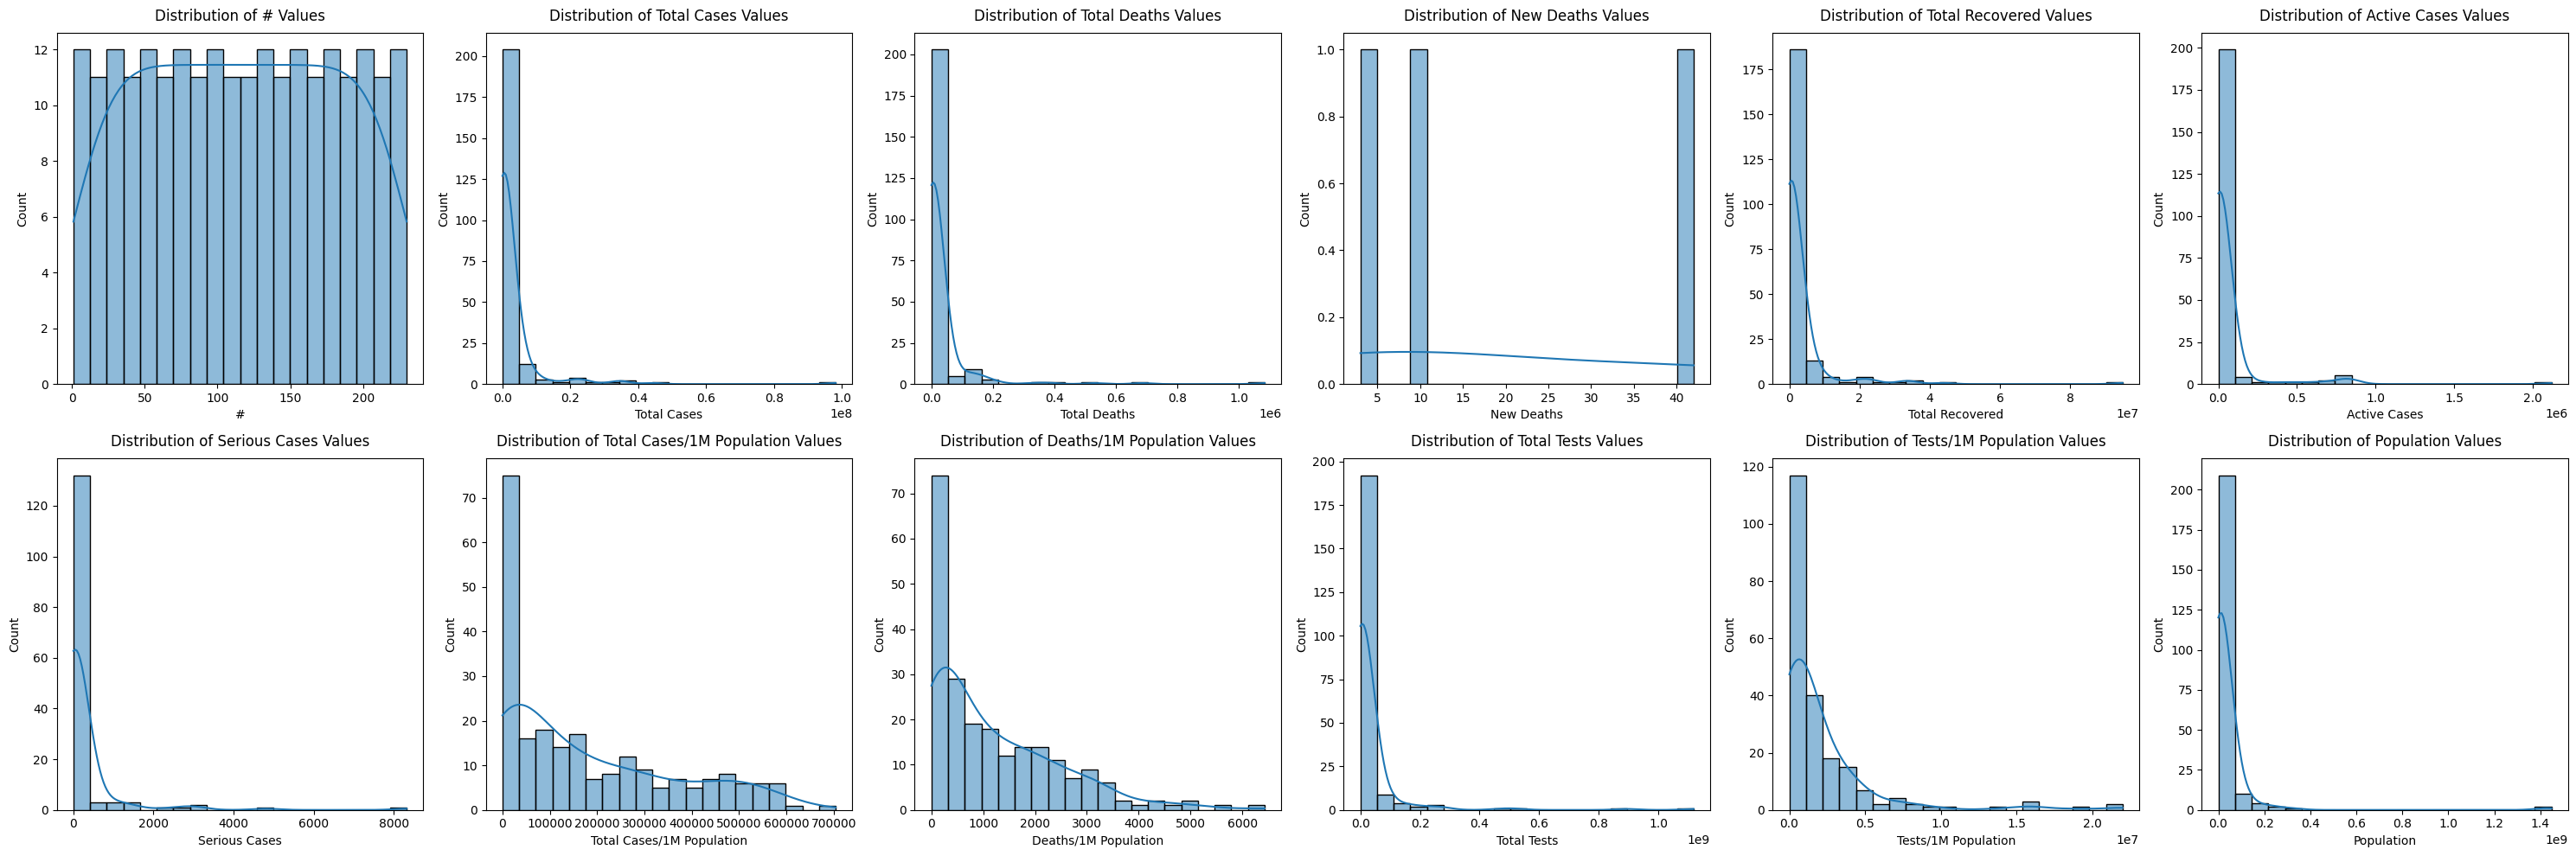

In [471]:
# Checking normality 

# Excluding 'Country' column
cols_to_plot = [col for col in df.columns if col != 'Country']

# Setting number of columns and rows for subplots
cols_num = len(cols_to_plot)
rows_num = 2

# Calculating number of subplots needed
subplots_needed = cols_num

# Calculating the number of subplots per row
subplots_per_row = cols_num // rows_num + (cols_num % rows_num > 0)

# Creating subplots with layout
fig, axes = plt.subplots(rows_num, subplots_per_row, figsize=(30, 10))
axes = axes.flatten()

# Displaying histogram for each column excluding Potability
for idx, column in enumerate(cols_to_plot):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column} Values', pad=10)  # Adjust title position

# Removing empty subplots
for idx in range(subplots_needed, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and font size
plt.tight_layout()
plt.show()


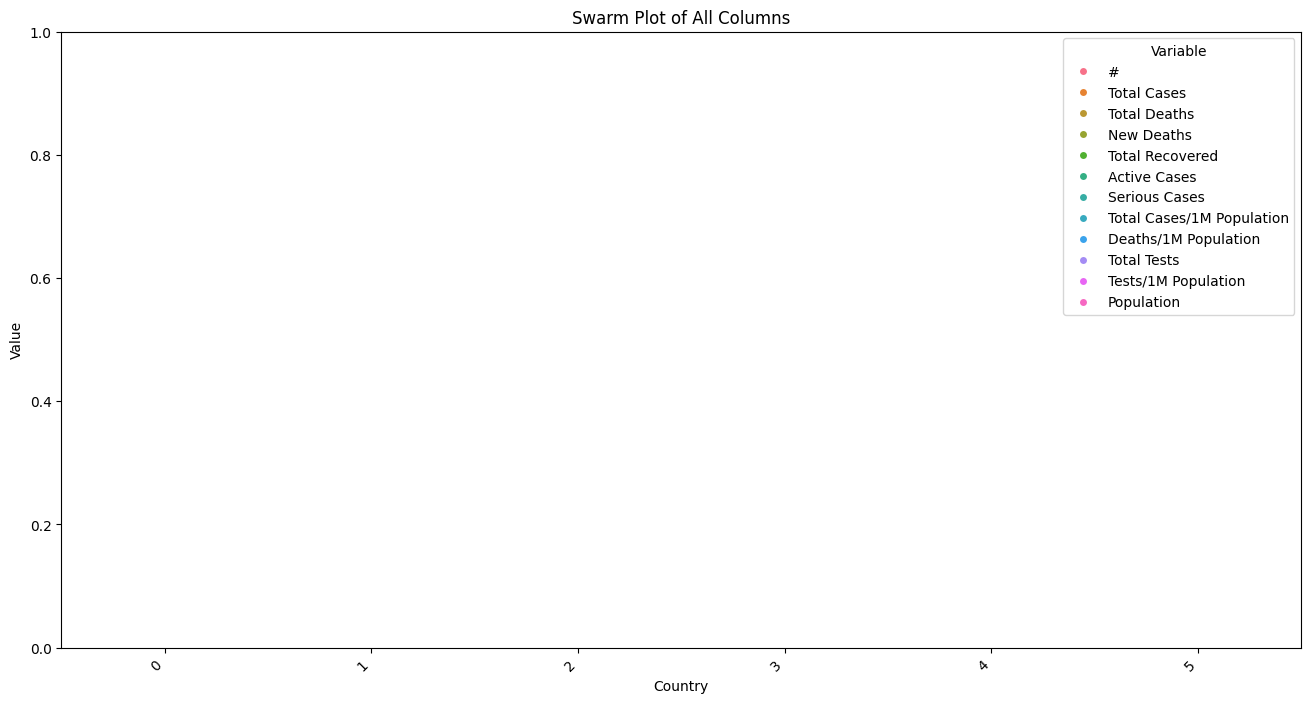

In [472]:
# Melting the DataFrame to long format
melted_df = pd.melt(df.head(20), id_vars='Country', var_name='Variable', value_name='Value')

# Creating a swarm plot
plt.figure(figsize=(16, 8))
sns.swarmplot(data=melted_df, x='Country', y='Value', hue='Variable', dodge=True)
plt.title('Swarm Plot of All Columns')
plt.xticks(rotation=45, ha='right')
plt.show()

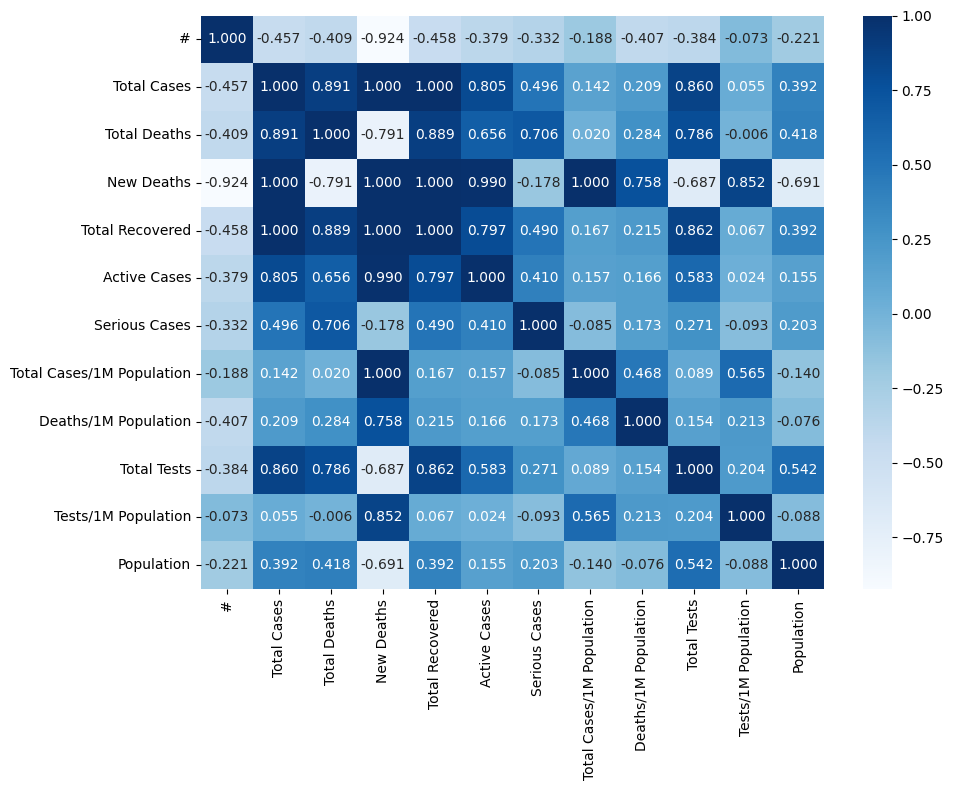

In [473]:
# Analysing Relationship Between Variables
correlation_matrix = df.drop('Country', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.3f')
plt.tight_layout()
plt.show()

<Axes: xlabel='Total Cases', ylabel='Total Tests'>

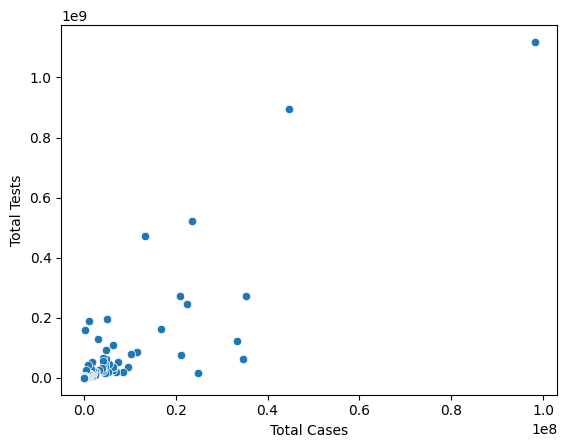

In [474]:
sns.scatterplot(data=df, x='Total Cases', y='Total Tests')

<Axes: xlabel='Total Cases', ylabel='Active Cases'>

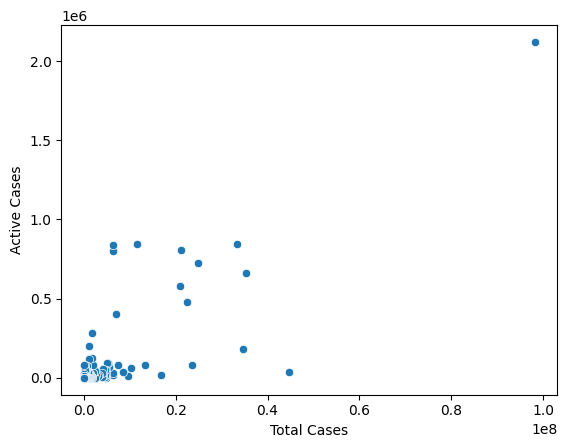

In [475]:
sns.scatterplot(data=df, x='Total Cases', y='Active Cases')

<Axes: xlabel='Total Cases', ylabel='Total Recovered'>

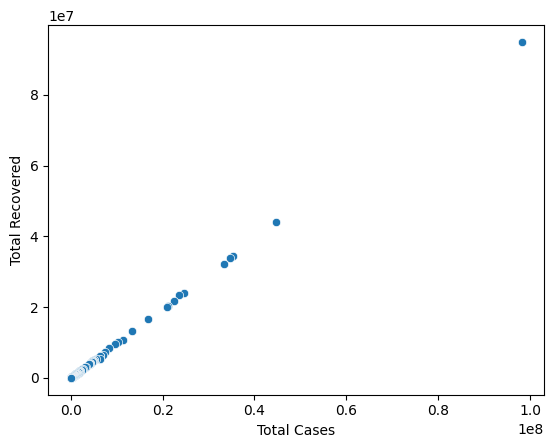

In [476]:
sns.scatterplot(data=df, x='Total Cases', y='Total Recovered')

<Axes: xlabel='Total Cases', ylabel='Total Deaths'>

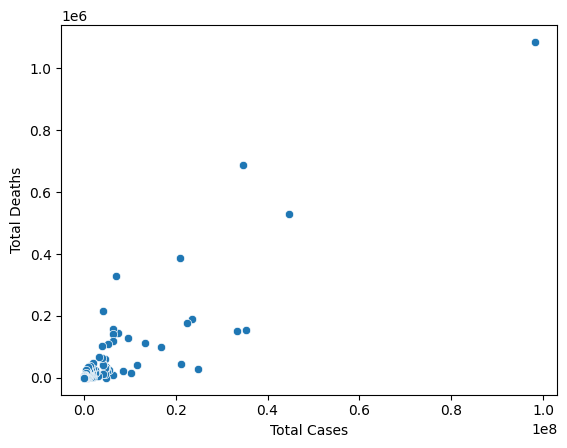

In [477]:
sns.scatterplot(data=df, x='Total Cases', y='Total Deaths')

<Axes: xlabel='Total Deaths', ylabel='Serious Cases'>

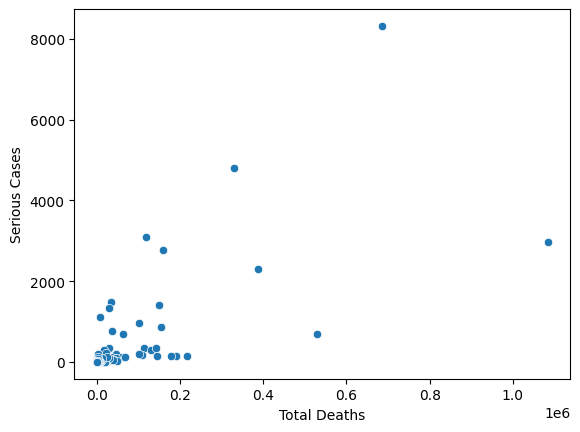

In [478]:
sns.scatterplot(data=df, x='Total Deaths', y='Serious Cases')

<Axes: xlabel='Total Deaths', ylabel='Total Tests'>

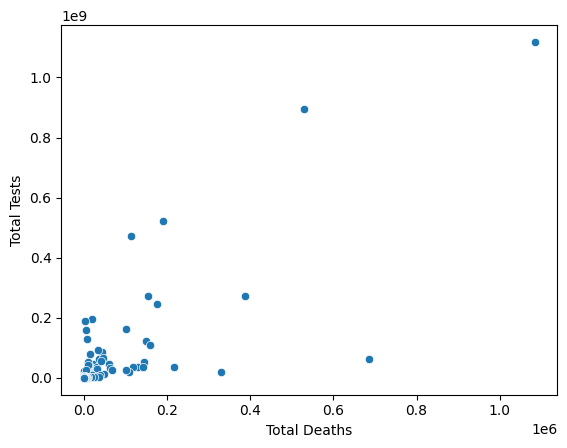

In [479]:
sns.scatterplot(data=df, x='Total Deaths', y='Total Tests')

<Axes: xlabel='Total Tests', ylabel='Total Recovered'>

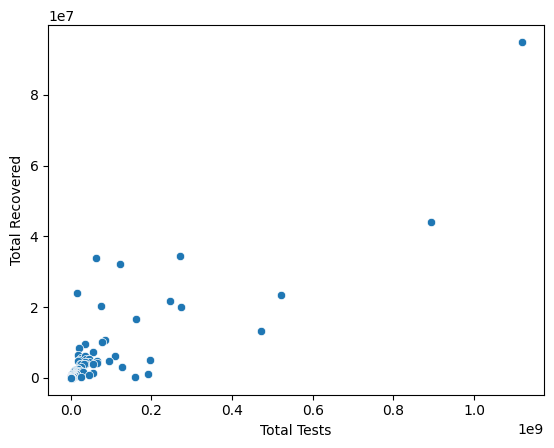

In [480]:
sns.scatterplot(data=df, x='Total Tests', y='Total Recovered')

## Data Wrangling

In [481]:
# Dropping New Deaths Column
df = df.drop('New Deaths', axis=1)

In [482]:
df.columns

Index(['#', 'Country', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Serious Cases', 'Total Cases/1M Population',
       'Deaths/1M Population', 'Total Tests', 'Tests/1M Population',
       'Population'],
      dtype='object')

In [483]:
# Handling Missing Values
df['Total Cases'].fillna(df['Total Cases'].mean(), inplace=True)
df['Total Tests'].fillna(df['Total Tests'].mean(), inplace=True)
df['Total Recovered'].fillna(df['Total Recovered'].mean(), inplace=True)

In [484]:
# Checking for Null Values
df.isnull().sum() / len(df) * 100

#                              0.000000
Country                      100.000000
Total Cases                    0.000000
Total Deaths                   2.173913
Total Recovered                0.000000
Active Cases                   6.521739
Serious Cases                 36.086957
Total Cases/1M Population      0.869565
Deaths/1M Population           3.043478
Total Tests                    0.000000
Tests/1M Population            6.956522
Population                     0.869565
dtype: float64

<Axes: xlabel='Total Cases', ylabel='Count'>

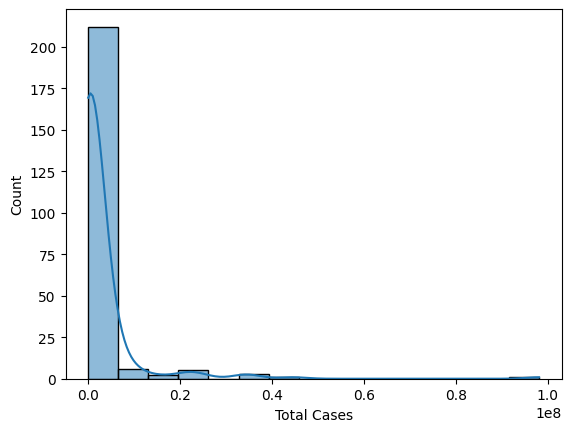

In [485]:
# Checking Normality of Variables of Interests
sns.histplot(data=df, x='Total Cases', bins=15, kde=True)

<Axes: xlabel='Total Tests', ylabel='Count'>

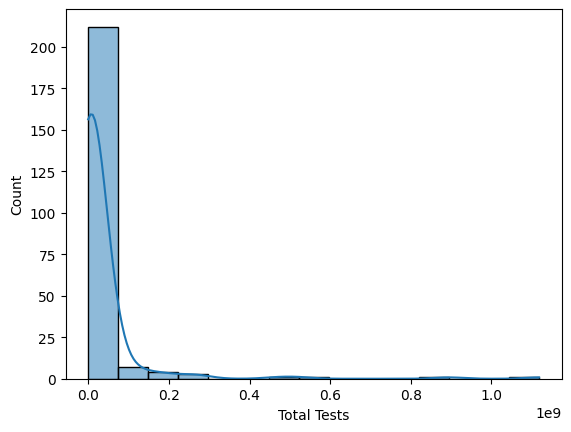

In [486]:
sns.histplot(data=df, x='Total Tests', bins=15, kde=True)

<Axes: xlabel='Total Recovered', ylabel='Count'>

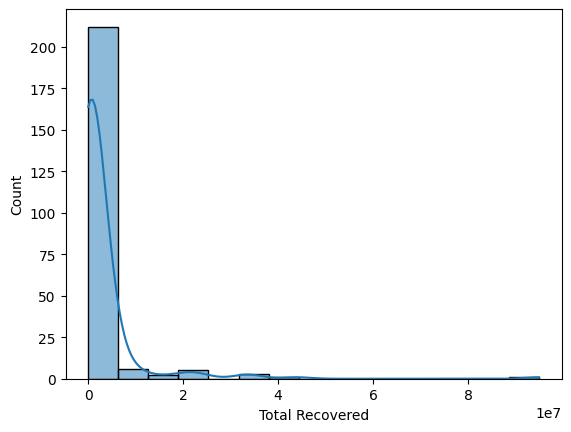

In [487]:
sns.histplot(data=df, x='Total Recovered', bins=15, kde=True)

In [488]:
df1 = df[['Total Cases', 'Total Tests', 'Total Recovered']]
df1.columns

Index(['Total Cases', 'Total Tests', 'Total Recovered'], dtype='object')

In [489]:
df1.head()

,Total Cases,Total Tests,Total Recovered
0,98166904,1.118159e+09,94962112.0
1,44587307,8.944169e+08,44019095.0
2,35342950,2.714902e+08,34527115.0
3,34706757,6.377617e+07,33838636.0
4,33312373,1.223324e+08,32315200.0


In [490]:
# Applying Log Transformation
df1_transformed = np.log1p(df1)
df1_transformed.head()

,Total Cases,Total Tests,Total Recovered
0,18.402180,20.834949,18.368989
1,17.612960,20.611683,17.600134
2,17.380610,19.419437,17.357256
3,17.362445,17.970890,17.337114
4,17.321439,18.622252,17.291048


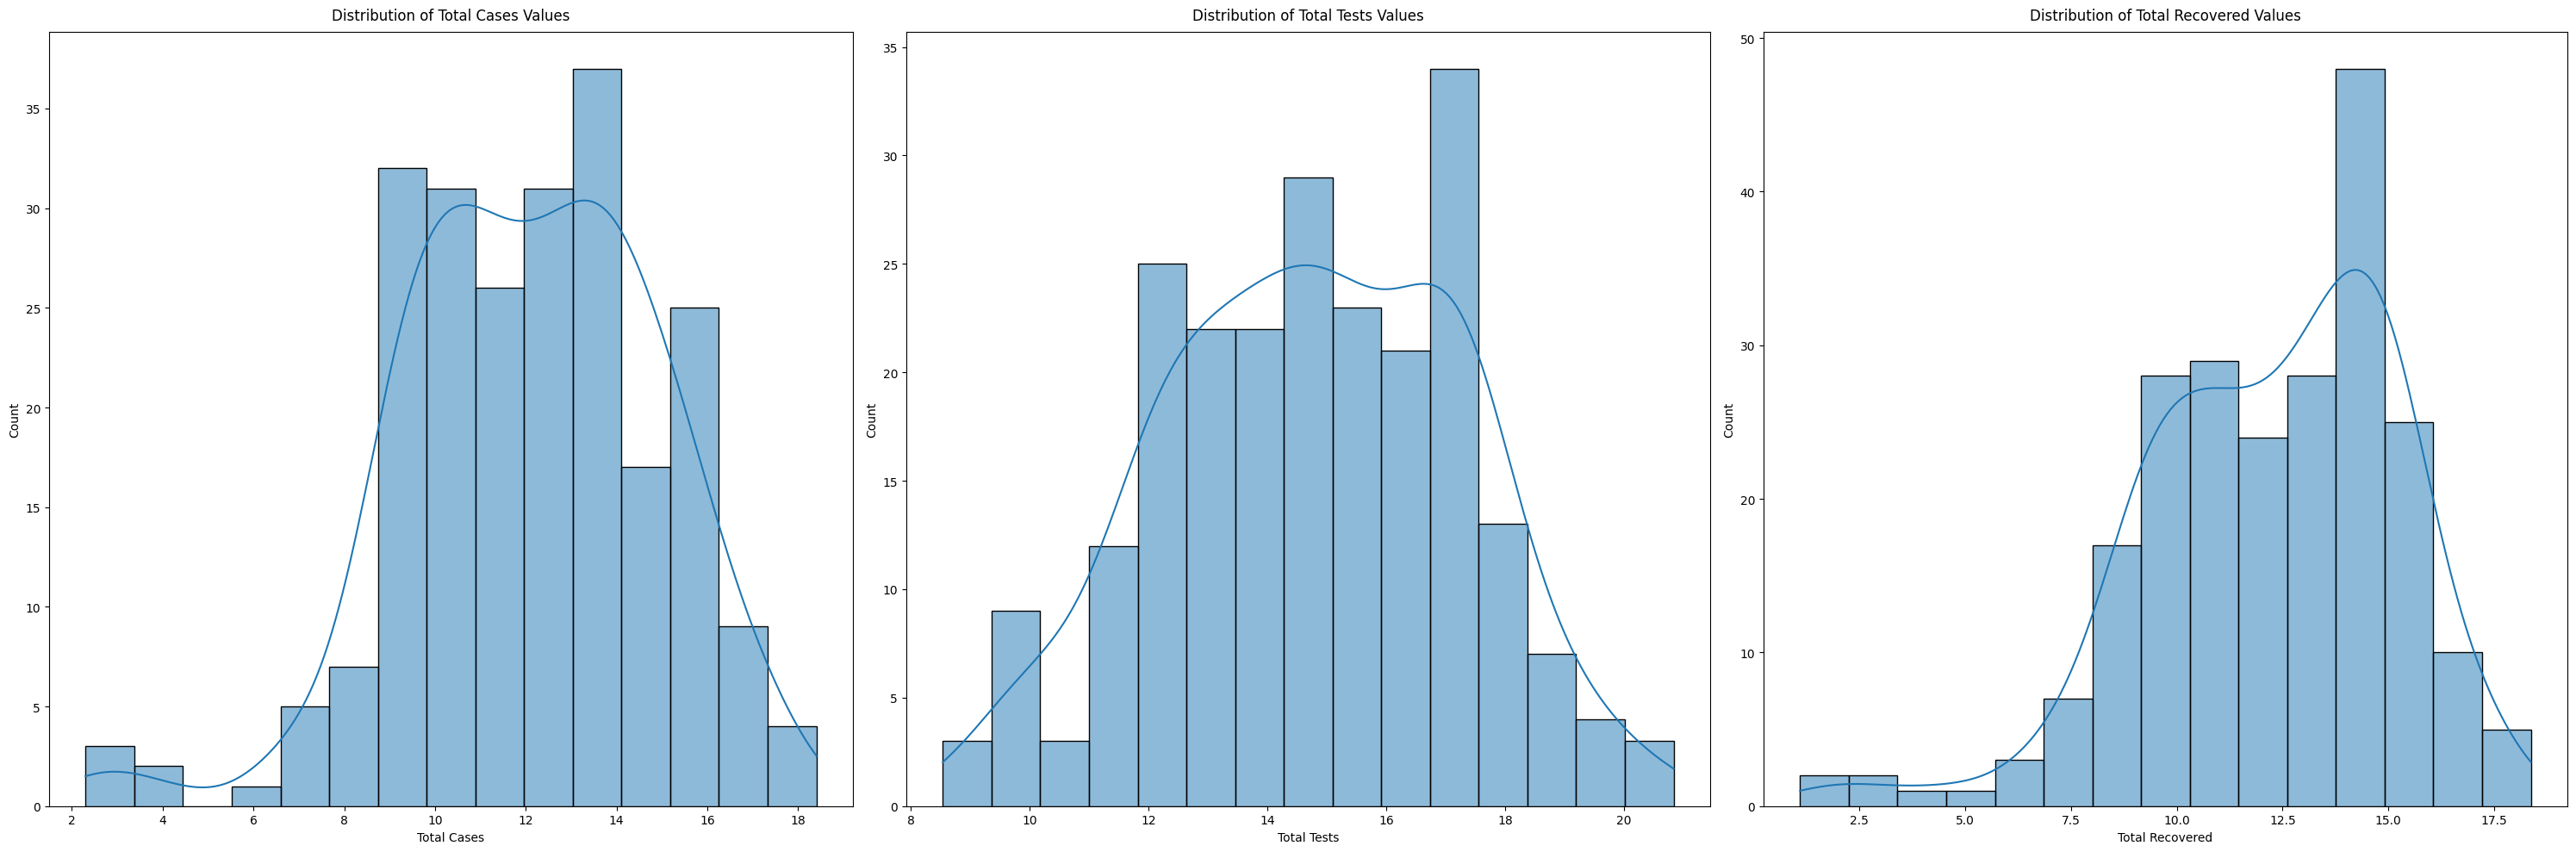

In [491]:
# Setting number of columns and rows for subplots
cols_num = len(df1_transformed.columns)
rows_num = 1

# Calculating number of subplots needed
subplots_needed = cols_num

# Calculating the number of subplots per row
subplots_per_row = cols_num // rows_num + (cols_num % rows_num > 0)

# Creating subplots with layout
fig, axes = plt.subplots(rows_num, subplots_per_row, figsize=(30, 10))
axes = axes.flatten()

# Displaying histogram for each column excluding Potability
for idx, column in enumerate(df1_transformed.columns):
    sns.histplot(df1_transformed[column], bins=15, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column} Values', pad=10)  # Adjust title position

# Removing empty subplots
for idx in range(subplots_needed, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and font size
plt.tight_layout()
plt.show()


In [492]:
from scipy.stats import shapiro
for column in df1_transformed.columns:
    stat, p_value = shapiro(df1_transformed[column])
    print(f"{column}: Statistic={stat}, p-value={p_value}")

Total Cases: Statistic=0.9745823740959167, p-value=0.00037419056752696633
Total Tests: Statistic=0.9895334243774414, p-value=0.09418582916259766
Total Recovered: Statistic=0.9607686996459961, p-value=6.019584816385759e-06


In [494]:
# Applying Box-Cox Transformation on log-transformed data
from scipy.stats import boxcox
for column in df1_transformed.columns:
    df1_transformed[column], lambda_value = boxcox(df[column] + 1)
print(lambda_value)
df1_transformed.head()


0.0834595380143033


,Total Cases,Total Tests,Total Recovered
0,31.564495,25.232992,43.522454
1,29.470737,24.909903,40.072706
2,28.871190,23.206214,39.028155
3,28.824636,21.184432,38.942478
4,28.719712,22.087099,38.747070


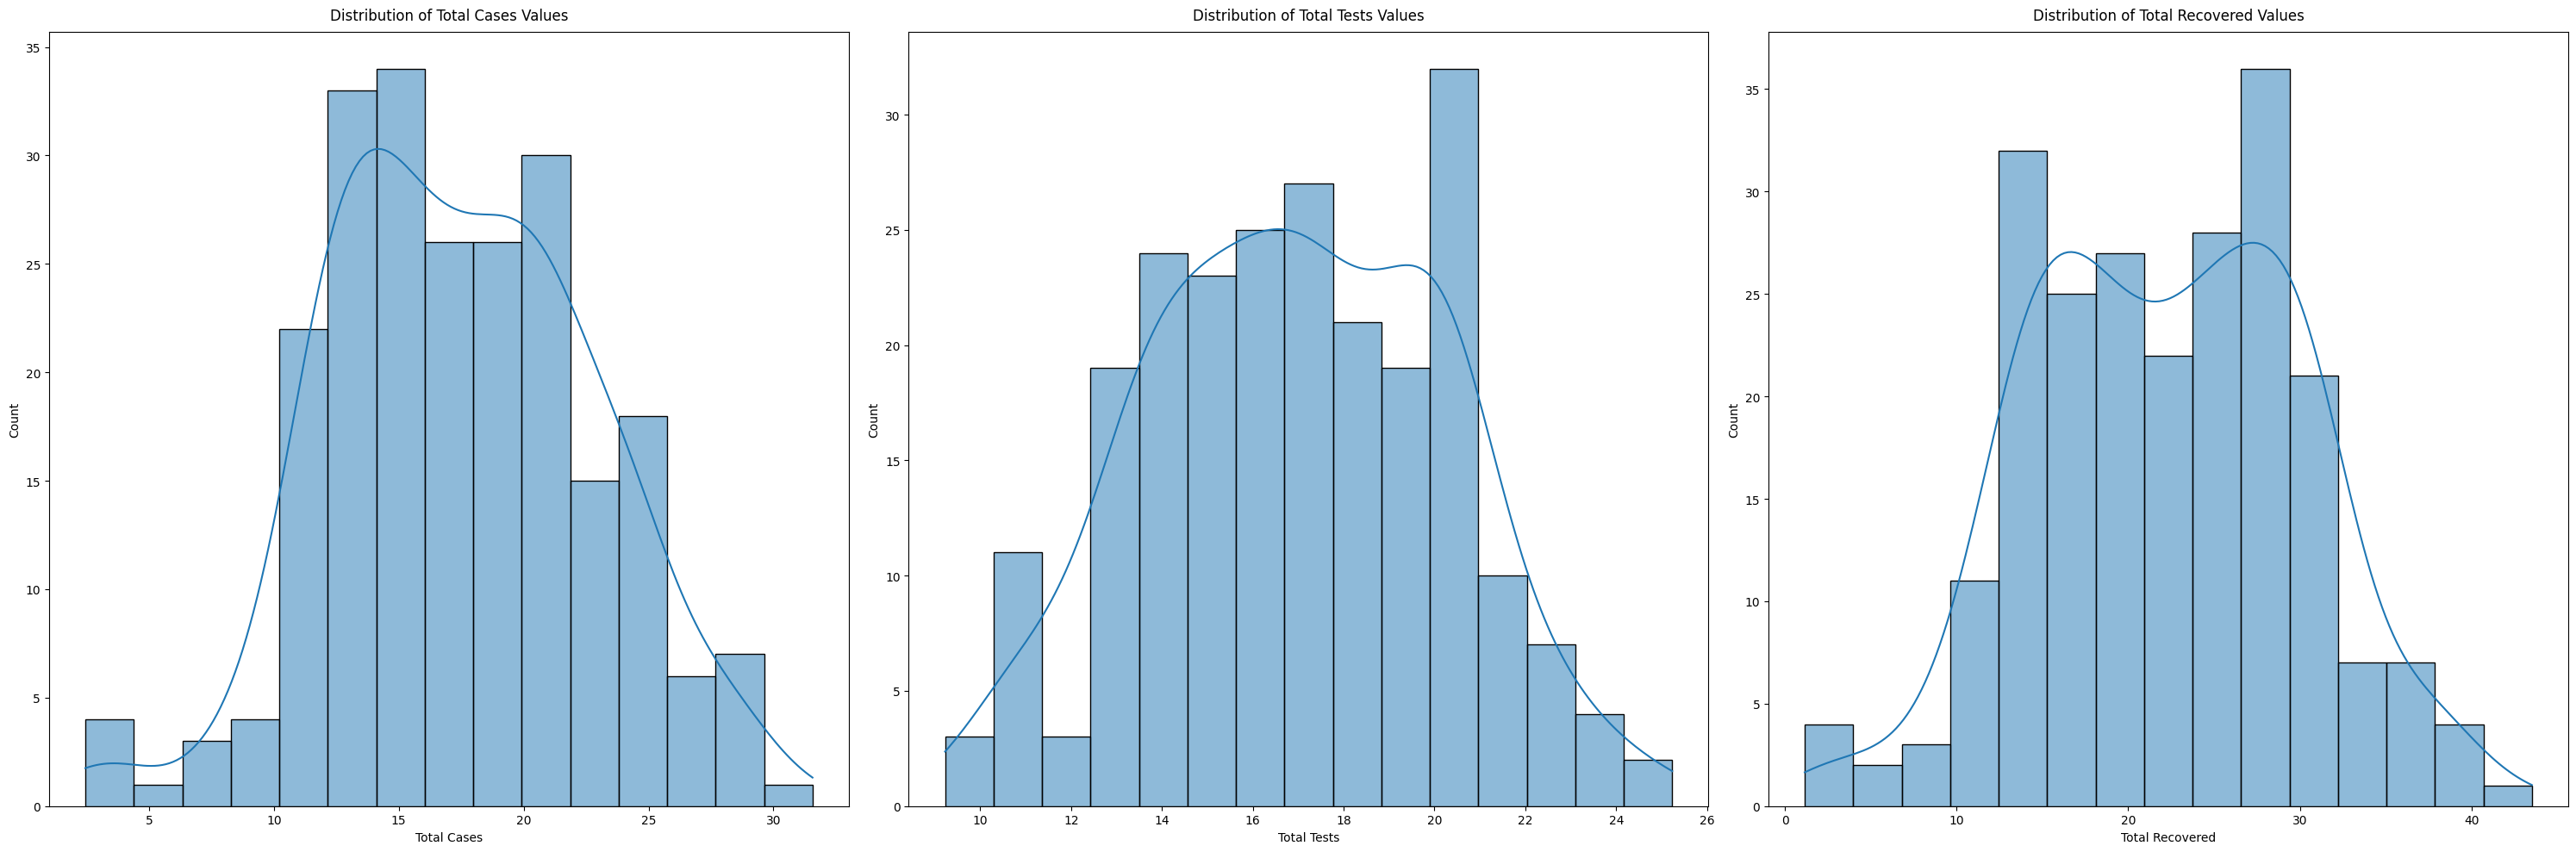

In [495]:
# Setting number of columns and rows for subplots
cols_num1 = len(df1_transformed.columns)
rows_num1 = 1

# Calculating number of subplots needed
subplots_needed1 = cols_num1

# Calculating the number of subplots per row
subplots_per_row1 = cols_num1 // rows_num1 + (cols_num1 % rows_num1 > 0)

# Creating subplots with layout
fig, axes = plt.subplots(rows_num1, subplots_per_row1, figsize=(30, 10))
axes = axes.flatten()

# Displaying histogram for each column excluding Potability
for idx, column in enumerate(df1_transformed.columns):
    sns.histplot(df1_transformed[column], bins=15, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column} Values', pad=10)  # Adjust title position

# Removing empty subplots
for idx in range(subplots_needed1, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and font size
plt.tight_layout()
plt.show()


In [497]:
from scipy.stats import shapiro
for column in df1_transformed.columns:
    stat, p_value = shapiro(df1_transformed[column])
    print(f"{column}: Statistic={stat}, p-value={p_value}")

Total Cases: Statistic=0.9891136884689331, p-value=0.07978564500808716
Total Tests: Statistic=0.9902926683425903, p-value=0.12694963812828064
Total Recovered: Statistic=0.9895999431610107, p-value=0.09669016301631927


In [498]:
# Hypothesis Testing
from scipy.stats import ttest_1samp
t_statistic, p_value = ttest_1samp(df1_transformed['Total Tests'], df1_transformed['Total Recovered'].mean())
print(f't-statistic: {t_statistic}, p-value: {p_value}')

t-statistic: -24.543878818949526, p-value: 4.716233178429569e-66


In [499]:
df1_transformed.describe()

,Total Cases,Total Tests,Total Recovered
count,230.000000,230.000000,230.000000
mean,17.469105,16.972356,22.273631
std,5.356455,3.275677,7.950390
min,2.452368,9.225208,1.150553
25%,13.393993,14.505827,15.867993
50%,17.336007,16.939248,22.574283
75%,21.043622,19.649499,28.850285
max,31.564495,25.232992,43.522454


In [500]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1_transformed_scaled = scaler.fit_transform(df1_transformed)
df1_transformed_scaled = pd.DataFrame(df1_transformed_scaled, columns=df1_transformed.columns)
df1_transformed_scaled.head()


,Total Cases,Total Tests,Total Recovered
0,1.000000,1.000000,1.000000
1,0.928080,0.979817,0.918584
2,0.907485,0.873388,0.893932
3,0.905886,0.747088,0.891910
4,0.902282,0.803477,0.887298


# Multiple Linear Regression 

In [501]:
# Defining X and y
X = df1_transformed_scaled[['Total Cases', 'Total Tests']]
y = df1_transformed_scaled['Total Recovered']

In [502]:
# Getting Model Parameters
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print(model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [503]:
# # Spliting data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [504]:
from sklearn.model_selection import GridSearchCV

# Defining the Parameter Grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],  # Corrected
    'n_jobs': [None, -1]  # Corrected
}

# Creating GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

# Training the model
grid_search.fit(X_train, y_train)

# Printing the Best Parameters and Score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}
Best Score: 0.7463819984036325


In [505]:
# Model Evaluation
from sklearn.metrics import r2_score

# Predicting y_test
y_pred = grid_search.predict(X_test)

# Calculating R-Score
r2 = r2_score(y_test, y_pred)
print("R-squared on Testing Set:", r2)

R-squared on Testing Set: 0.916764935280859


In [518]:
# Getting Prediction from New Input Values
X1 = 121245
X2 = 1111

# Lambda value
lambda_value = 0.0834595380143033

# One-liner for log transformation, boxcox, and minmax scaling
transformed_X1 = scaler.transform(boxcox(np.log1p(np.array([X1]).reshape(1, -1)).flatten() + 1, lmbda=lambda_value).reshape(1, -1))
transformed_X2 = scaler.transform(boxcox(np.log1p(np.array([X2]).reshape(1, -1)).flatten() + 1, lmbda=lambda_value).reshape(1, -1))
print(transformed_X1)
print(transformed_X2)

[[0.00746861]]
[[-0.55149549]]


In [519]:
y_prediction = grid_search.predict([[0.00746861, -0.55149549 ]])
y_prediction


C:\Users\Kabir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.00152142])